In [1]:
pip install pandas scikit-learn tensorflow


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
print(os.listdir('/content/drive/My Drive/Colab Notebooks/'))

['redes neuronales.ipynb', 'Ventas.csv', 'scrip 01.ipynb', 'Pruebas.ipynb', 'Cod_img.ipynb', 'scrip 3.ipynb', 'tarea_1_caracteristicas.ipynb', 'JFA tarea_1_caracteristicas.ipynb', 'jfa kmeans and clust- patrones.ipynb', 'analisis patrones nparm.ipynb', 'Untitled0.ipynb', 'Tarea_Foro_4_Bayes_Clasificacion.ipynb', 'penguins.xlsx', 'Untitled1.ipynb', 'tarea 4', 'copy of Perceptron_AND.ipynb', 'Copy of Perceptron_OR.ipynb', 'Copy of  corre en R [CODATA-RDA-datatrieste] Perceptron AND-rlang-solution.ipynb', 'Copy of Perceptron_XOR 1-0-0-1 - plots.ipynb', 'Copy of Perceptron_XOR - plots - solution.ipynb', 'Copy of Feature Selection   AutoML   Hyperparameter Optimization - crbds2024', 'Copy of Perceptron_XOR definitivo con - plots - solution2.ipynb', 'Copy of MNIST MLP - Solution, con dropout', 'Copy of MNIST MLP', 'Copy of Image Jet Tagging Analysis (PTJ 250-300) - crbds2024', 'Copy of COVID19 Chest CTS -  crbds2024', 'Untitled2.ipynb', 'penguins.csv', 'scrip 2.ipynb']


In [23]:
import pandas as pd

# Especificar el nombre del archivo con la ruta correcta
nombreArchivo = '/content/drive/My Drive/Colab Notebooks/penguins.csv'

# Leer el archivo CSV con el delimitador correcto
penguins = pd.read_csv(nombreArchivo, delimiter=';')

# Mostrar las primeras filas del DataFrame
print(penguins.head())


  species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Biscoe            53.4           17.8              219.0   
1  Adelie  Biscoe            49.3           18.1              245.0   
2  Adelie  Biscoe            55.7           16.6              226.0   
3  Adelie  Biscoe            38.0           15.6              221.0   
4  Adelie  Biscoe            60.7           17.9              177.0   

   body_mass_g     sex  diet life_stage health_metrics  
0       5687.0  female  fish      adult     overweight  
1       6811.0  female  fish      adult     overweight  
2       5388.0  female  fish      adult     overweight  
3       6262.0  female  fish      adult     overweight  
4       4811.0  female  fish   juvenile     overweight  


In [24]:
# Preprocesar datos
# Convertir variables categóricas en numéricas
label_encoders = {}
for column in ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']:
    le = LabelEncoder()
    penguins[column] = le.fit_transform(penguins[column])
    label_encoders[column] = le

# Separar las características y la variable objetivo
X = penguins.drop('species', axis=1)
y = penguins['species']

# Normalizar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Construir el modelo
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(label_encoders['species'].classes_), activation='softmax'))

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5282 - loss: 0.9828 - val_accuracy: 0.6873 - val_loss: 0.7561
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.6907 - val_accuracy: 0.6836 - val_loss: 0.6235
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7354 - loss: 0.5587 - val_accuracy: 0.7236 - val_loss: 0.5496
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7687 - loss: 0.4868 - val_accuracy: 0.7709 - val_loss: 0.5027
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7849 - loss: 0.4586 - val_accuracy: 0.7891 - val_loss: 0.4630
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7949 - loss: 0.4263 - val_accuracy: 0.8109 - val_loss: 0.4274
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8177 - loss: 0.3964 - val_accuracy: 0.8109 - val_loss: 0.4085
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.3737 - val_accuracy: 0.8364 - val_loss: 0.3819
Epo

In [35]:
# Evaluar el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8439 - loss: 0.3751 
Test Accuracy: 0.85


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


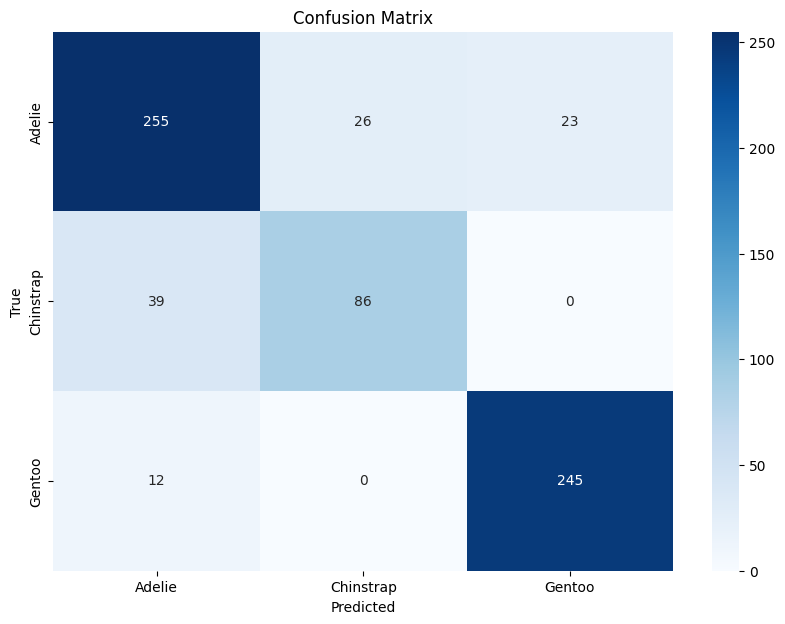

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Hacer predicciones
y_pred = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=-1)

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['species'].classes_, yticklabels=label_encoders['species'].classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



Classification Report:
              precision    recall  f1-score   support

      Adelie       0.81      0.76      0.78       304
   Chinstrap       0.73      0.68      0.71       125
      Gentoo       0.85      0.95      0.90       257

    accuracy                           0.81       686
   macro avg       0.80      0.80      0.80       686
weighted avg       0.81      0.81      0.81       686



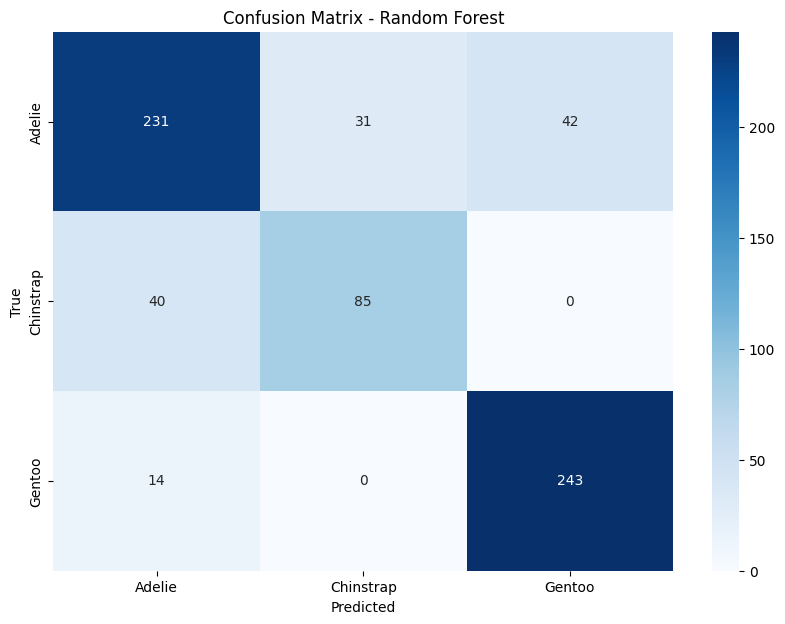

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones con el set de prueba
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoders['species'].classes_))

# Crear la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Convertir la matriz de confusión a un DataFrame para que muestre los nombres de las categorías
cm_df = pd.DataFrame(cm,
                     index=label_encoders['species'].classes_,
                     columns=label_encoders['species'].classes_)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()




In [40]:
# Evaluar el modelo Neural
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Neural Accuracy: {accuracy:.2f}")


from sklearn.metrics import accuracy_score, cohen_kappa_score

# Hacer predicciones con el set de prueba
y_pred = rf_model.predict(X_test)

# Calcular el accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"RF Accuracy: {accuracy:.2f}")

# Calcular el Kappa
kappa = cohen_kappa_score(y_test, y_pred)
print(f"RF Cohen's Kappa: {kappa:.2f}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8439 - loss: 0.3751 
Neural Accuracy: 0.85
RF Accuracy: 0.81
RF Cohen's Kappa: 0.71


K = 2, Accuracy: 0.77
K = 3, Accuracy: 0.78
K = 4, Accuracy: 0.77
K = 5, Accuracy: 0.78
K = 6, Accuracy: 0.78
K = 7, Accuracy: 0.79
K = 8, Accuracy: 0.79
K = 9, Accuracy: 0.81
K = 10, Accuracy: 0.80
K = 11, Accuracy: 0.79
K = 12, Accuracy: 0.79
K = 13, Accuracy: 0.80
K = 14, Accuracy: 0.80
K = 15, Accuracy: 0.79
K = 16, Accuracy: 0.79
K = 17, Accuracy: 0.77
K = 18, Accuracy: 0.77
K = 19, Accuracy: 0.77
K = 20, Accuracy: 0.75


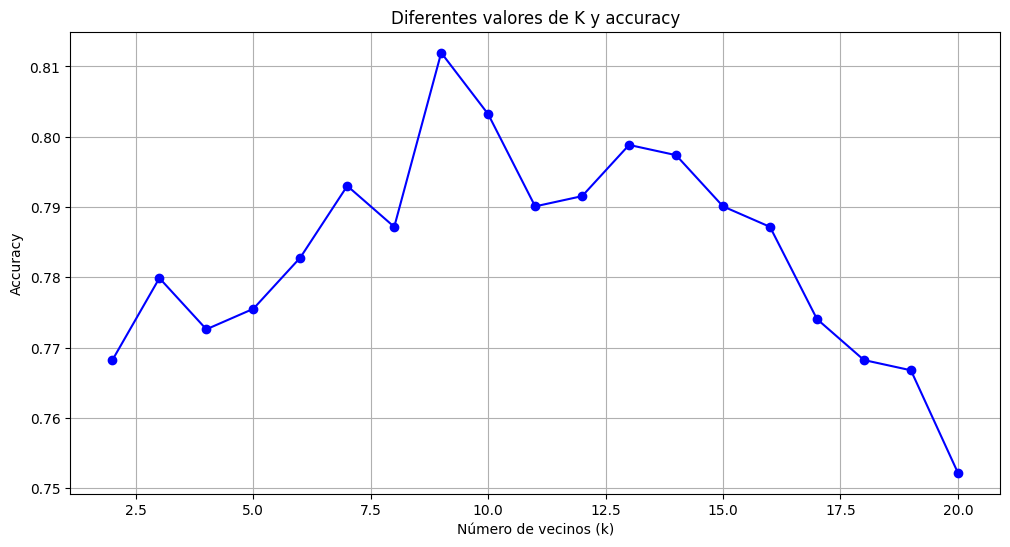

In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
# Convertir variables categóricas en numéricas
label_encoders = {}
for column in ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']:
    le = LabelEncoder()
    penguins[column] = le.fit_transform(penguins[column])
    label_encoders[column] = le

# Separar las características y la variable objetivo
X = penguins.drop('species', axis=1)
y = penguins['species']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Rastrear diferentes valores de k para KNN
k_range = range(2, 21)
accuracies = []

for k in k_range:
    # Crear el modelo KNN
    knn = KNeighborsClassifier(n_neighbors=k)

    # Entrenar el modelo
    knn.fit(X_train, y_train)

    # Hacer predicciones con el set de prueba
    y_pred = knn.predict(X_test)

    # Calcular accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"K = {k}, Accuracy: {accuracy:.2f}")

# Graficar la exactitud en función de k
plt.figure(figsize=(12, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='-', color='b')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy')
plt.title('Diferentes valores de K y accuracy')
plt.grid(True)
plt.show()



K = 9, Accuracy: 0.81


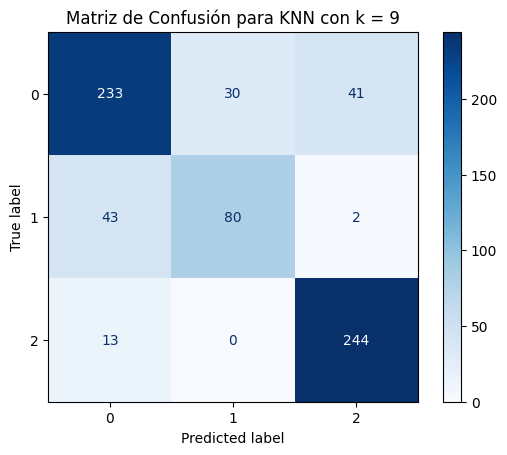

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Cargar y preprocesar los datos
# Convertir variables categóricas en numéricas
label_encoders = {}
for column in ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']:
    le = LabelEncoder()
    penguins[column] = le.fit_transform(penguins[column])
    label_encoders[column] = le

# Verificar las etiquetas para 'species'
species_labels = label_encoders['species'].classes_

# Separar las características y la variable objetivo
X = penguins.drop('species', axis=1)
y = penguins['species']

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir el conjunto de datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Definir el valor de k para el modelo KNN
k = 9  # Puedes cambiar este valor según lo que quieras probar

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones con el set de prueba
y_pred = knn.predict(X_test)

# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"K = {k}, Accuracy: {accuracy:.2f}")

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred, labels=label_encoders['species'].transform(species_labels))

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=species_labels)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Matriz de Confusión para KNN con k = {k}')
plt.show()


In [50]:
# Calcular accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"K = {k}, Accuracy: {accuracy:.2f}")


K = 9, Accuracy: 0.81
